# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | izberbash
Processing Record 2 of Set 1 | karoi
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | klyuchi
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | constantia
Processing Record 8 of Set 1 | uturoa
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | kyabe
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | mutoko
Processing Record 15 of Set 1 | tarfaya
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | gizo
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | kings

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,izberbash,42.5696,47.8645,4.52,74,22,0.66,RU,1737407400
1,karoi,-16.8099,29.6925,18.26,92,100,1.16,ZW,1737407401
2,ushuaia,-54.8000,-68.3000,11.18,81,100,1.46,AR,1737407403
3,klyuchi,52.2667,79.1667,-3.61,95,100,7.42,RU,1737407404
4,waitangi,-43.9535,-176.5597,14.90,80,95,3.58,NZ,1737407405


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,izberbash,42.5696,47.8645,4.52,74,22,0.66,RU,1737407400
1,karoi,-16.8099,29.6925,18.26,92,100,1.16,ZW,1737407401
2,ushuaia,-54.8000,-68.3000,11.18,81,100,1.46,AR,1737407403
3,klyuchi,52.2667,79.1667,-3.61,95,100,7.42,RU,1737407404
4,waitangi,-43.9535,-176.5597,14.90,80,95,3.58,NZ,1737407405


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

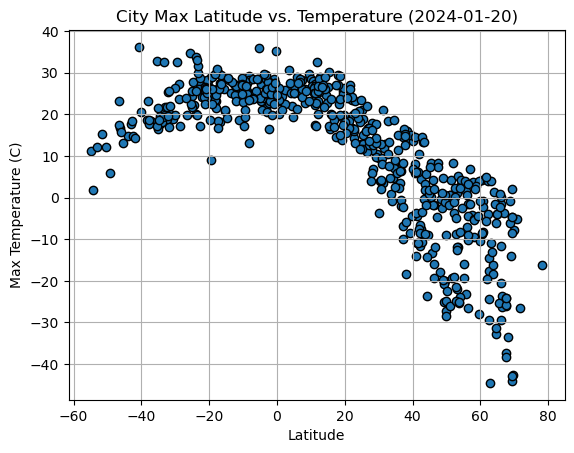

In [ ]:
# Build scatter plot for latitude vs. temperature
###Angel helped me add the edgecolors and linewidth to the marker 
lat_values = city_data_df["Lat"]
temp_values = city_data_df["Max Temp"]
plt.scatter(lat_values,temp_values,marker="o", edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-01-20)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

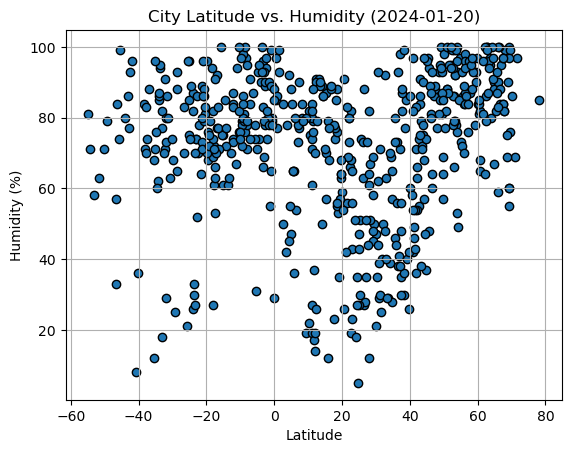

In [23]:
# Build the scatter plots for latitude vs. humidity
humidity_values = city_data_df["Humidity"]
plt.scatter(lat_values,humidity_values,marker="o", edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-01-20)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

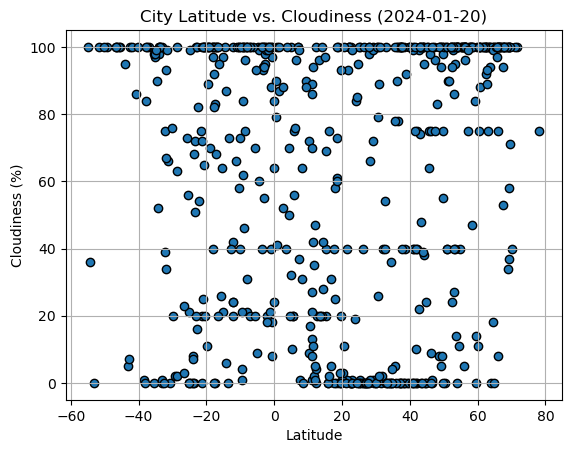

In [24]:
# Build the scatter plots for latitude vs. cloudiness
cloud_values = city_data_df["Cloudiness"]
plt.scatter(lat_values,cloud_values,marker="o", edgecolors="black", linewidths=1)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-01-20)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

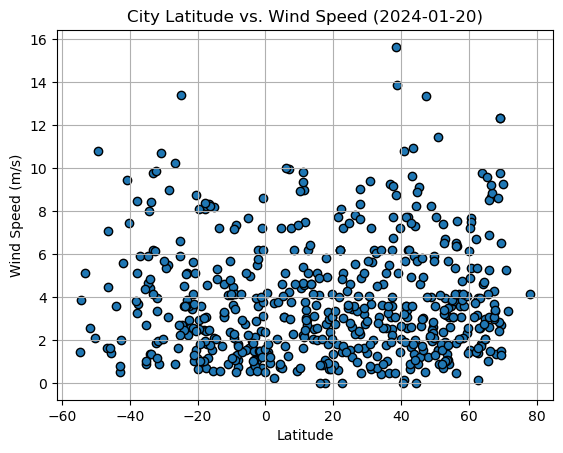

In [25]:
# Build the scatter plots for latitude vs. wind speed
wind_values = city_data_df["Wind Speed"]
plt.scatter(lat_values,wind_values, marker="o", edgecolors="black", linewidths=1)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-01-20)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
### Angel helped me with this code during my tutor session
def plot_linear_regression(x_values, y_values, coordinates, label): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(label)
    plt.title(f"Latitude vs {label}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,izberbash,42.5696,47.8645,4.52,74,22,0.66,RU,1737407400
3,klyuchi,52.2667,79.1667,-3.61,95,100,7.42,RU,1737407404
5,constantia,44.1833,28.6500,0.38,68,38,2.00,RO,1737407407
9,kyabe,9.4515,18.9449,29.66,19,90,0.54,TD,1737407412
11,ribeira grande,38.5167,-28.7000,15.22,77,40,15.65,PT,1737407415


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,karoi,-16.8099,29.6925,18.26,92,100,1.16,ZW,1737407401
2,ushuaia,-54.8000,-68.3000,11.18,81,100,1.46,AR,1737407403
4,waitangi,-43.9535,-176.5597,14.90,80,95,3.58,NZ,1737407405
6,uturoa,-16.7333,-151.4333,27.47,77,100,8.32,PF,1737407409
7,geraldton,-28.7667,114.6000,27.23,65,100,3.09,AU,1737407406


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7040618282862314


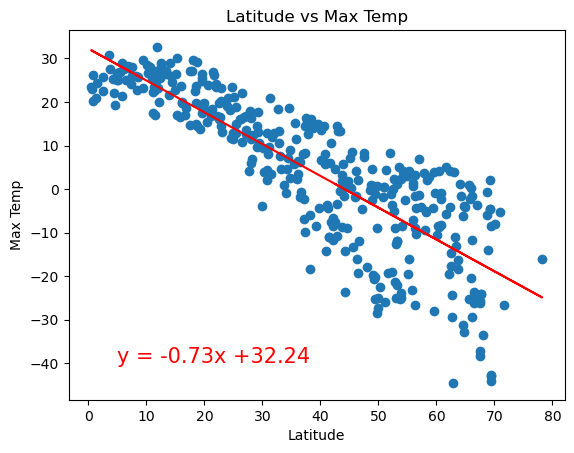

In [22]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, (5,-40), "Max Temp")


The r^2-value is: 0.2624146558835491


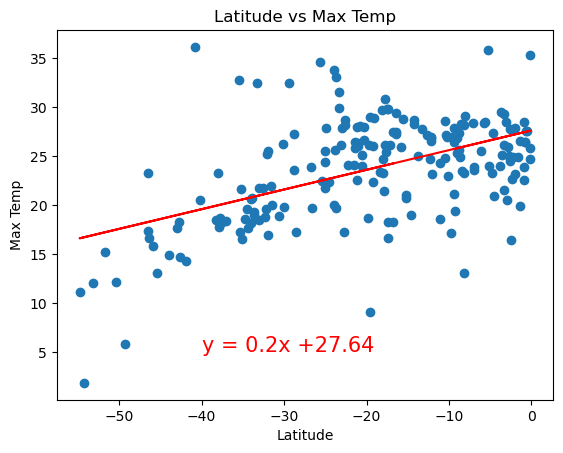

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, (-40,5), "Max Temp")


**Discussion about the linear relationship:** 

The Northern Hemisphere exhibits a negative, steeper slope, indicating that temperature decreases more rapidly as latitude increases. In contrast, the Southern Hemisphere shows a positive, gentler slope, meaning temperature increases slightly as latitude approaches the equator. 

Comparing r2 values, the Northern Hemisphere demonstrates a stronger relationship between latitude and temperature, likely due to its larger landmasses and fewer oceans. The greater ocean coverage in the Southern Hemisphere causes temperature variations, thereby weakening the correlation between latitude and temperature.

**Conclusion:**  
Latitude and temperature have a stronger, more predictable relationship in the Northern Hemisphere compared to the Southern Hemisphere, where the relationship is weaker due to the influence of oceans on weather.



### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.1551925408000987


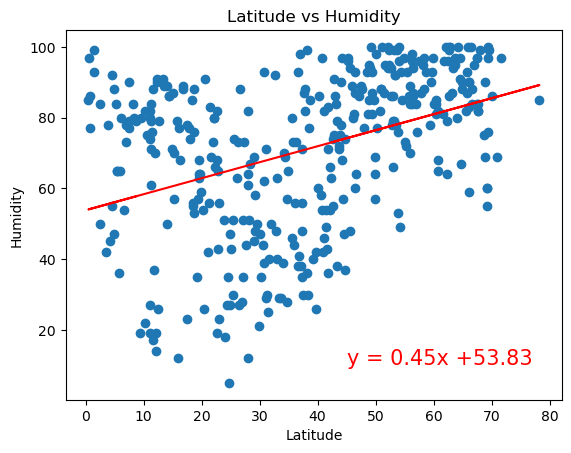

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, (45,10), "Humidity")

The r^2-value is: 0.048709428799420355


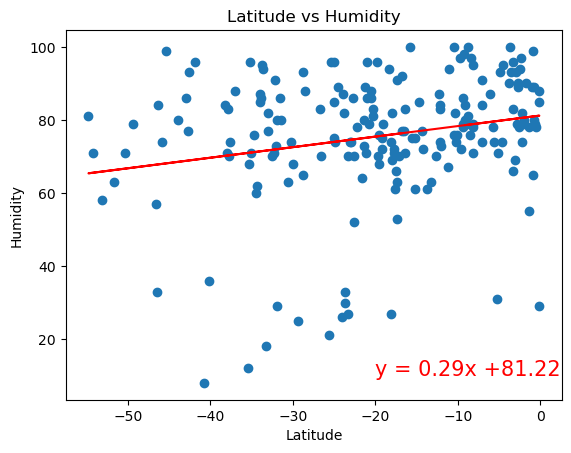

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, (-20,10), "Humidity")

**Discussion about the linear relationship:** 

The Northern Hemisphere shows a moderate positive slope, indicating humidity increases with latitude, while the Southern Hemisphere has a gentler positive slope, reflecting a weaker relationship. The r2 value for the Northern Hemisphere ( 0.155 ) suggests a slightly stronger correlation compared to the Southern Hemisphere (0.049 ), where ocean coverage likely weakens the relationship.

**Conclusion:**

Overall, there appears to be a weak correlation between humidy and latitude for both hemispheres. Humidity has a slightly stronger correlation with latitude in the Northern Hemisphere, while the Southern Hemisphere shows a minimal relationship, likely due to ocean influence. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.11600866378534189


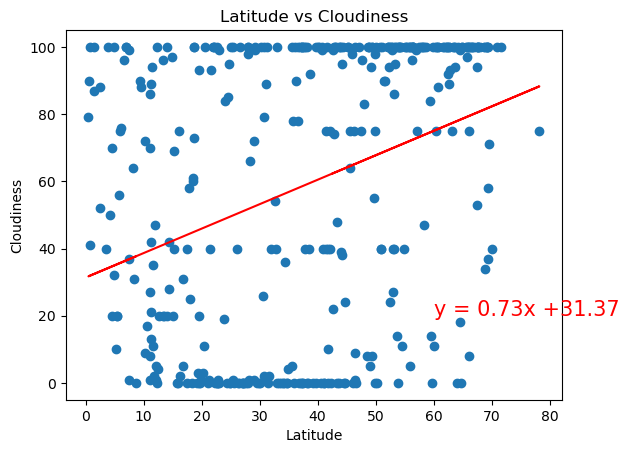

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, (60,20), "Cloudiness")

The r^2-value is: 0.0009012399822851693


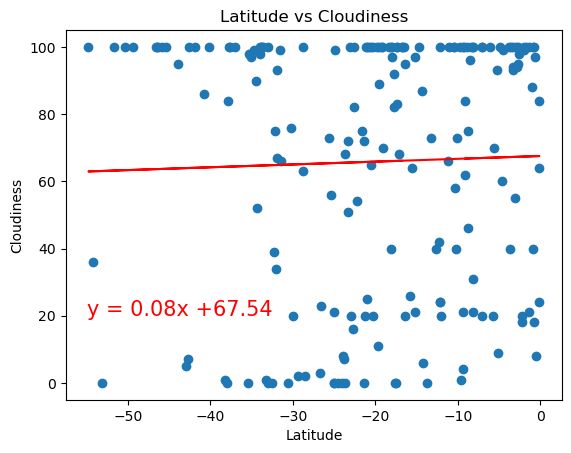

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, (-55,20), "Cloudiness")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the regression line shows a positive slope, suggesting a slight increase in cloudiness with latitude. However, the r2 value ( 0.116 ) indicates a weak relationship, meaning latitude explains only about 11.6% of the variation in cloudiness.

In the Southern Hemisphere, the regression line also has a positive slope, but it is nearly flat. The r2 value ( 0.0009 ) reveals a negligible relationship, suggesting latitude has no impact on cloudiness in this region.

**Conclusion**

Cloudiness shows a weak correlation with latitude in the Northern Hemisphere and no relationship in the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.008020446061217839


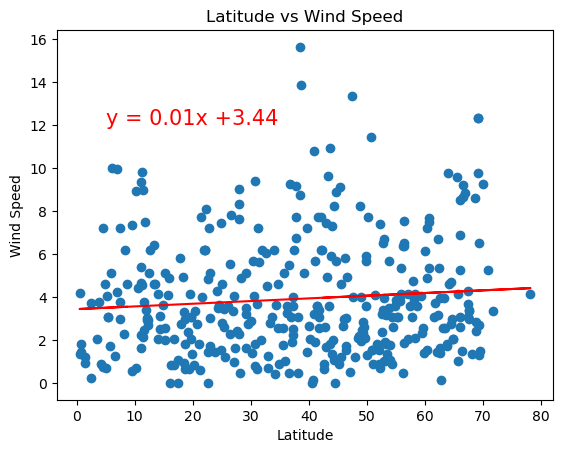

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, (5,12), "Wind Speed")

The r^2-value is: 0.041511782985538974


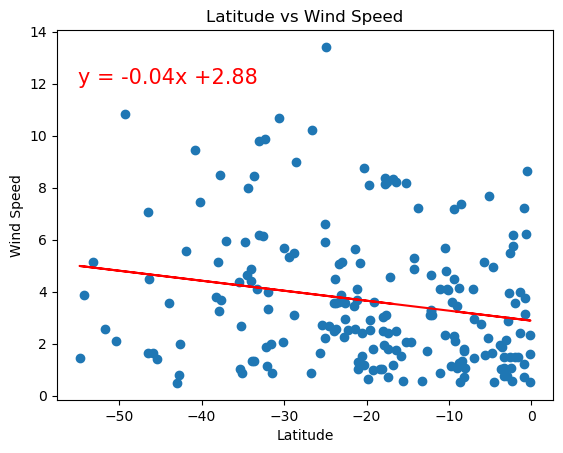

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, (-55,12), "Wind Speed")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the positive slope indicates a very minimal increase in wind speed with latitude, while the Southern Hemisphere shows a negative slope, suggesting a slight decrease in wind speed as latitude approaches the equator. Both plots exhibit weak relationships, as indicated by the nearly flat slopes and high variability in wind speed.

Both hemispheres have nearly zero r2 values, which indicates weak to no correlation. 

**Conclusion:**

Wind speed shows a weak and inconsistent correlation with latitude in both hemispheres, with minimal differences in patterns. External factors seem to have a greater impact on wind speed than latitude. 